In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
#load data
df = pd.read_csv('C:/Users/Sahar/Desktop/Final aasignment/data.csv')
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


### Inforamation about features of dataset : 

- ad_id : an unique ID for each ad
- reporting_start : the start of the reporting of the advertisement's reach
- reporting_end : the start of the reporting of the advertisement's reach
- campaign_id: an ID associated with each ad campaign of XYZ company
- fb_campaign_id: an ID associated with how Facebook tracks each campaign
- age: age of the person to whom the ad is shown
- gender: gender of the person to whim the add is shown
- interest(1,2,3): a code specifying the category to which the person’s interest belongs                                            
(interests are as mentioned in the person’s Facebook public profile).
- impressions: the number of times the ad was shown
- clicks: number of clicks on for that ad
- spent: Amount paid by company xyz to Facebook, to show that ad
- total_conversion: Total number of people who enquired about the product after seeing the ad
- approved_conversion: Total number of people who bought the product after seeing the ad

In [4]:
df.shape

(1143, 15)

In [5]:
#information about data like dtyle and non null and numbers of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [6]:
# this shows us in 2 columns we have missing valuse(NAN)
# we have to perform this (like fill or drop)
df.isnull().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

In [7]:
# we can see most of values are 1 in total conversation 
# we fill the NAN with 1
print(df["total_conversion"].value_counts())
df["total_conversion"].fillna(1.0,inplace=True)

1.0     546
2.0      89
3.0      34
4.0      26
5.0      19
7.0       9
0.0       5
6.0       5
13.0      4
22.0      4
11.0      3
8.0       3
17.0      2
10.0      2
23.0      1
31.0      1
40.0      1
9.0       1
20.0      1
26.0      1
60.0      1
24.0      1
28.0      1
15.0      1
Name: total_conversion, dtype: int64


In [8]:
# we can see most of values are 0 in approved_conversion
# we fill the NAN with 0
print(df["approved_conversion"].value_counts())
df["approved_conversion"].fillna(0.0,inplace=True)

0.0     408
1.0     273
2.0      43
3.0      15
4.0       6
8.0       3
14.0      2
5.0       2
7.0       2
6.0       2
10.0      1
17.0      1
21.0      1
9.0       1
12.0      1
Name: approved_conversion, dtype: int64


In [9]:
# we check again 
# we do not have missing values
df.isnull().sum()

ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

In [10]:
# descrive numeric columns of datafram
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,33.884514,1.180606e+05,42.474191,6.872500e+04,11.629921,17.597760,1.773403,0.511811
std,1.939928e+05,27.560263,2.670506e+05,48.987248,2.067023e+05,27.347899,48.418711,3.358904,1.399146
min,7.087460e+05,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,16.000000,2.200000e+01,19.000000,1.442650e+02,1.000000,0.000000,1.000000,0.000000
50%,1.121185e+06,26.000000,3.300000e+01,27.000000,3.142000e+03,2.000000,1.530000,1.000000,0.000000
75%,1.121804e+06,32.000000,9.889400e+04,38.000000,2.786400e+04,8.000000,8.540000,1.000000,1.000000
max,1.314415e+06,120.000000,2.286228e+06,421.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [11]:
# we see a problem
# in Gender we have some of data thats Gender is unknown
df["gender"].value_counts()

M      486
F      275
31      19
30      15
24      14
      ... 
72       1
4        1
9        1
12       1
118      1
Name: gender, Length: 63, dtype: int64

In [12]:
# we just select the data which hava known Gender
df = df.iloc[:761,:]

In [13]:
# double check every things OK
df["gender"].value_counts()

M    486
F    275
Name: gender, dtype: int64

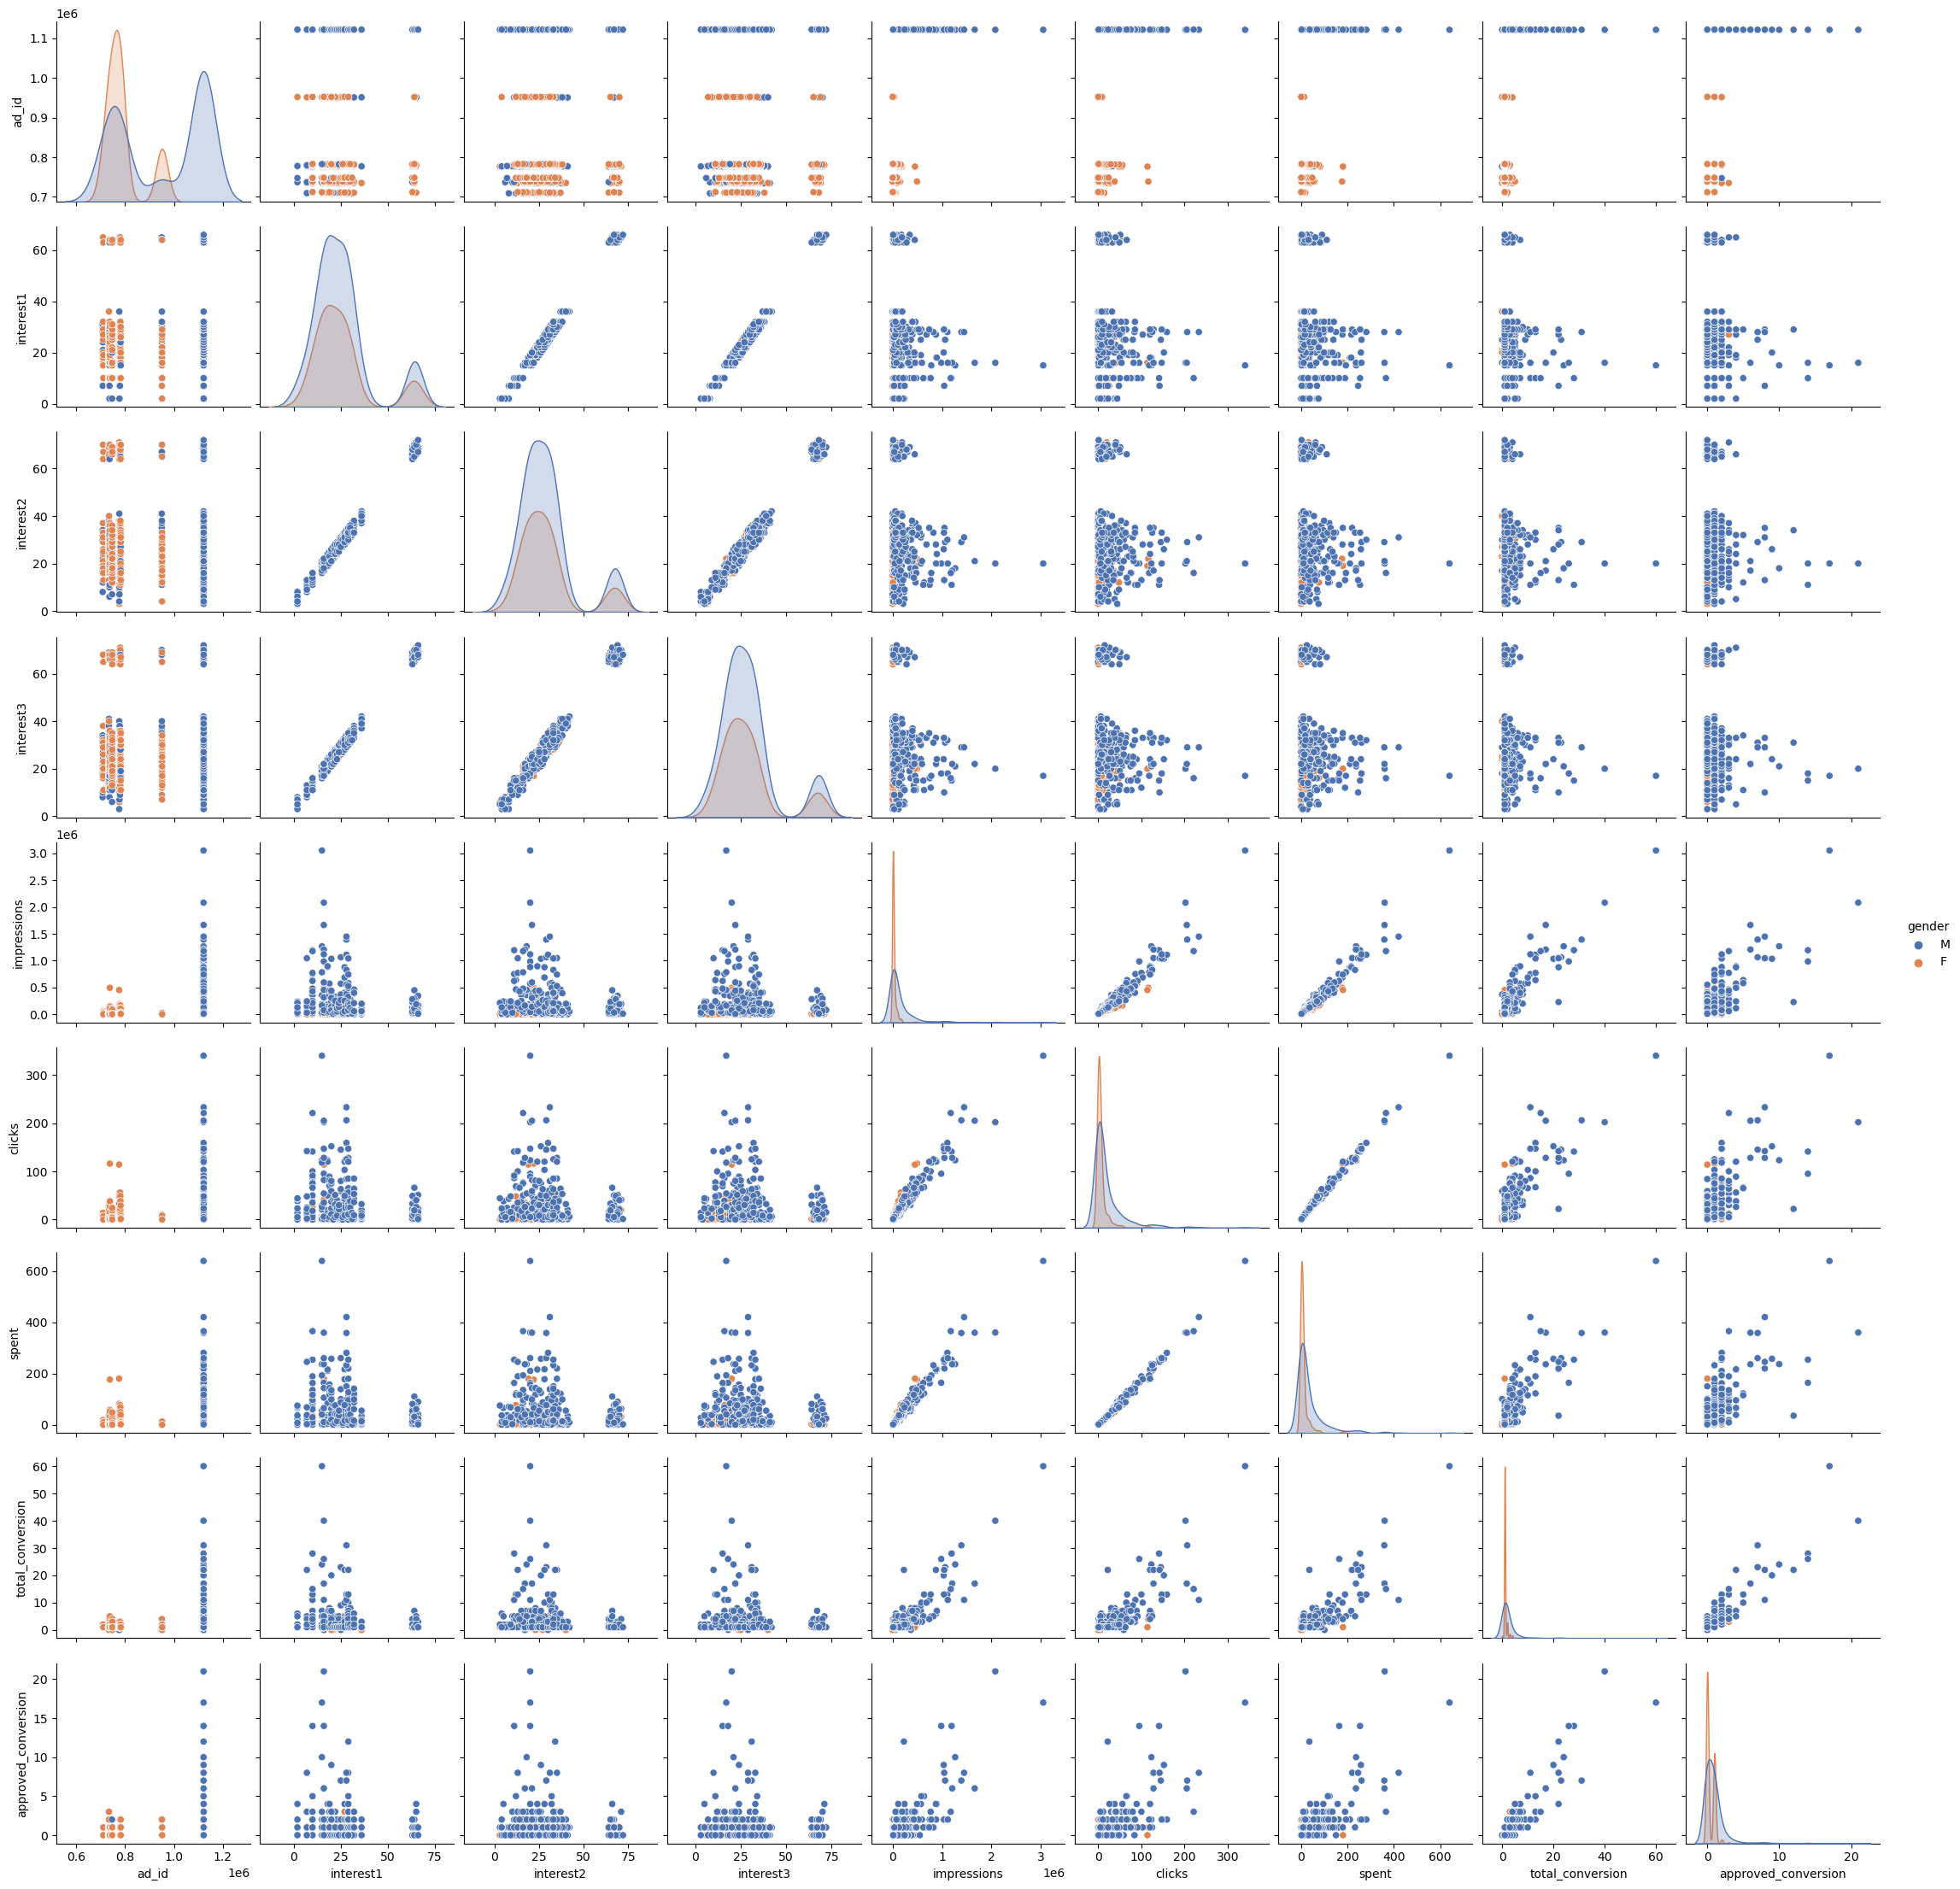

In [14]:
# plot feature versus other features in datafram
sns.pairplot(df,hue="gender",palette="deep")

30-34    219
35-39    128
40-44     92
45-49     47
Name: age, dtype: int64
30-34    108
45-49     68
35-39     52
40-44     47
Name: age, dtype: int64


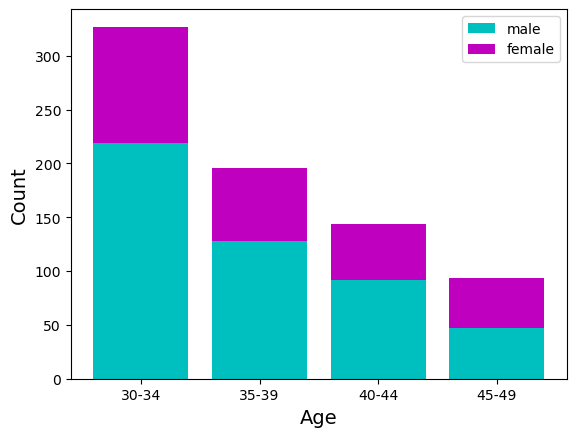

In [15]:
#plot the bar 
male = df["age"][df["gender"] == "M"].value_counts()
female = df["age"][df["gender"] == "F"].value_counts()

fig , ax = plt.subplots()

ax.bar(range(4),male,label="male",color="c")
ax.bar(range(4),female,bottom=male,label="female",color="m")
ax.set(xticks=[0,1,2,3],xticklabels=["30-34","35-39","40-44","45-49"])
ax.set_xlabel("Age",fontdict={"fontsize":14})
ax.set_ylabel("Count",fontdict={"fontsize":14})
ax.legend();
print(male)
print(female)

C:\Users\Sahar\AppData\Local\Temp\ipykernel_12136\2192191789.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Heatmap')

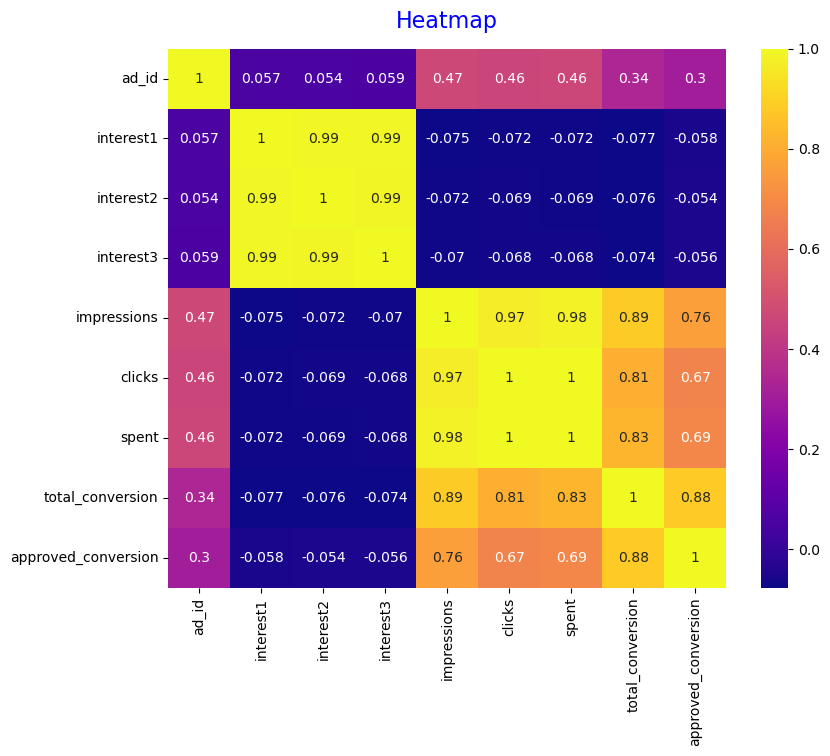

In [16]:
# heatmap shows the correlation between features
import seaborn as sbs
fig , ax = plt.subplots(figsize=(9,7))
corr = df.corr()
sbs.heatmap(corr,annot=True,ax=ax,cmap="plasma")
ax.set_title("Heatmap",fontdict={"fontsize":16,"color":"blue"},pad=15)

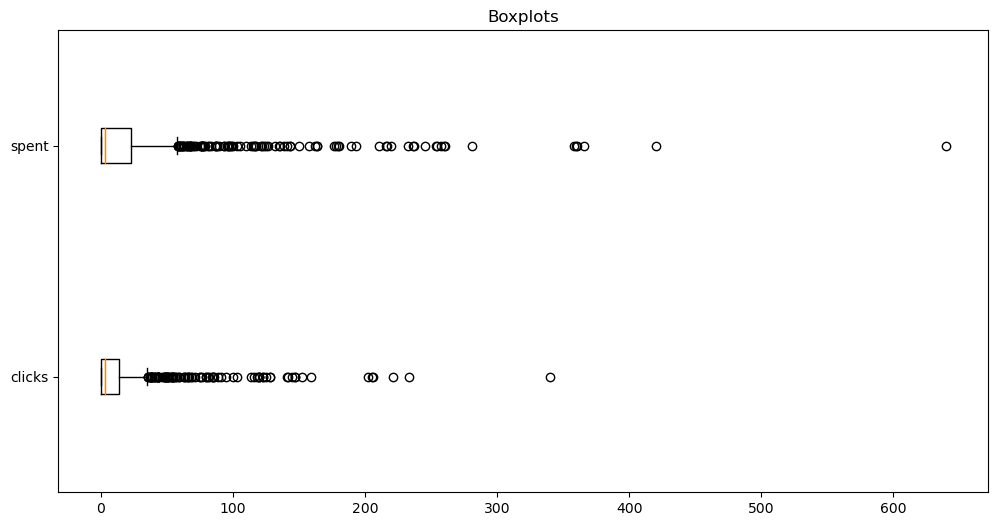

In [17]:
# this is the boxplot show range of data and outlires
fig , ax = plt.subplots(figsize=(12,6))
ax.boxplot(df[['clicks',"spent"]],vert=False)
ax.set_yticklabels(['clicks',"spent"])
ax.set_title("Boxplots");

Text(0.5, 0.98, 'Histogram')

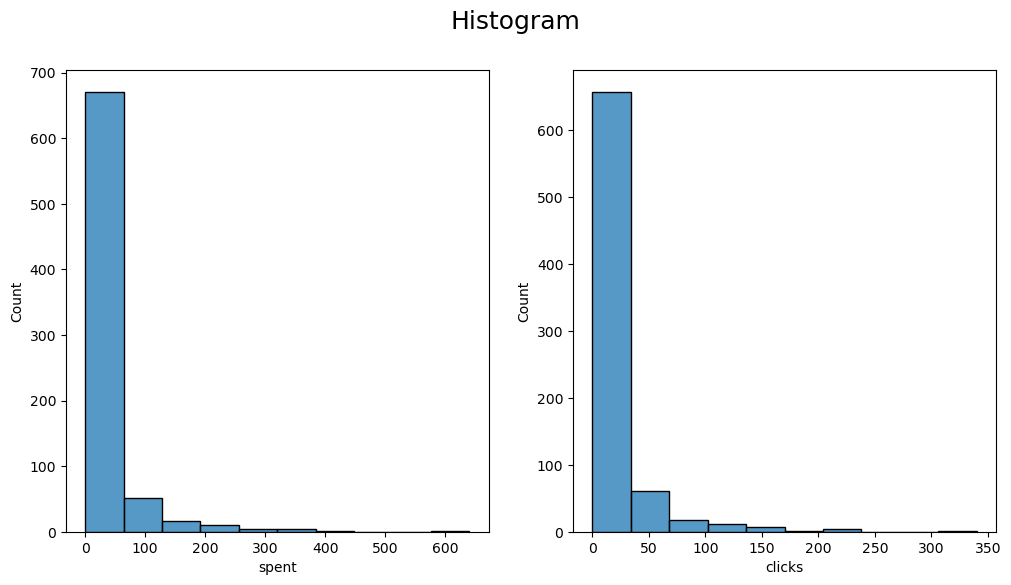

In [18]:
# histogram
fig ,ax = plt.subplots(1,2,figsize=(12,6))
sns.histplot(df["spent"],bins=10,ax=ax[0])
sns.histplot(df["clicks"],bins=10,ax=ax[1])
fig.suptitle("Histogram",fontsize=18)

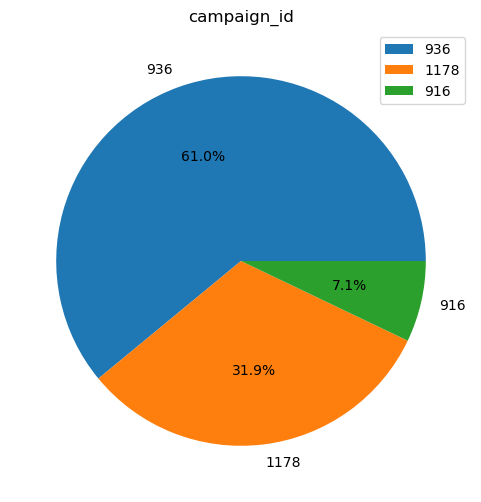

In [19]:
fig , ax = plt.subplots(figsize=(6,6))
ax.pie(df["campaign_id"].value_counts(),autopct="%1.1f%%",labels=["936","1178","916"]);
ax.set_title("campaign_id")
ax.legend();


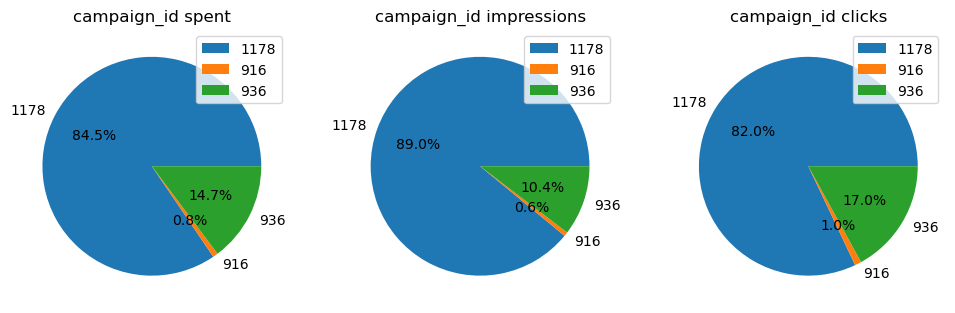

In [20]:
# for a extra informaton 
fig , ax = plt.subplots(1,3,figsize=(12,6))
ax[0].pie((df.groupby(['campaign_id'])).spent.sum(),autopct="%1.1f%%",labels=["1178","916","936"])
ax[0].set_title("campaign_id spent")
ax[1].pie((df.groupby(['campaign_id'])).impressions.sum(),autopct="%1.1f%%",labels=["1178","916","936"])
ax[1].set_title("campaign_id impressions")
ax[2].pie((df.groupby(['campaign_id'])).clicks.sum(),autopct="%1.1f%%",labels=["1178","916","936"])
ax[2].set_title("campaign_id clicks")
ax[0].legend()
ax[1].legend()
ax[2].legend();

In [21]:
df.head(4)

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0


In [22]:
# devided data fram to categorical and numerical and target
cat_df = np.array(df[["age","gender"]])
numeric = np.array(df.iloc[:,[10,11,13,14]])
target = np.array(df["spent"]).reshape(-1,1)

#encoder the cat
cat_df = cat_df.flatten()
enc = LabelEncoder().fit(cat_df)
#transform
cat_enc = enc.transform(cat_df)
#reshape
cat_enc = cat_enc.reshape((df.shape[0],2))


In [23]:
# classes of label encoder
# for example 30-34 got 0 and F got 4
enc.classes_

array(['30-34', '35-39', '40-44', '45-49', 'F', 'M'], dtype=object)

In [24]:
# make agian Dataframe and concat the devided parts of Datafram
total = pd.DataFrame(np.concatenate([cat_enc,numeric,target],axis=1),
                     columns=["age","gender","impressions","clicks","total_conversion","approved_conversion","spent"])
total.head()

,age,gender,impressions,clicks,total_conversion,approved_conversion,spent
0,0.0,5.0,7350.0,1.0,2.0,1.0,1.43
1,0.0,5.0,17861.0,2.0,2.0,0.0,1.82
2,0.0,5.0,693.0,0.0,1.0,0.0,0.00
3,0.0,5.0,4259.0,1.0,1.0,0.0,1.25
4,0.0,5.0,4133.0,1.0,1.0,1.0,1.29


<Axes: >

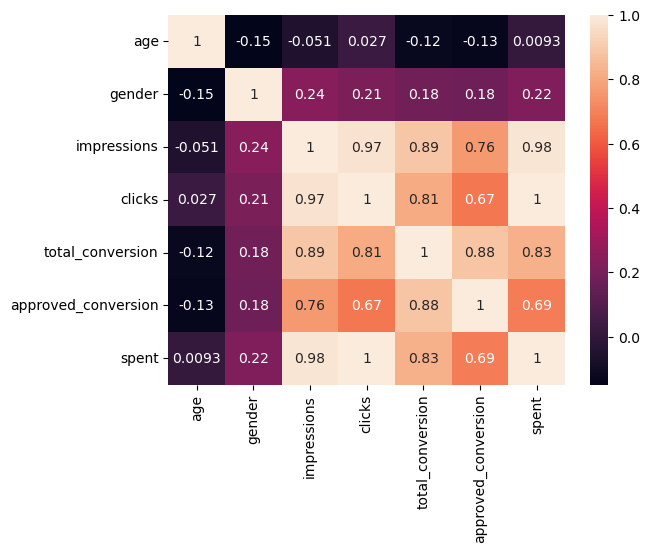

In [25]:
# show again correlation
# but this age ad gender added and some features deleted
sns.heatmap(total.corr(),annot=True)

In [26]:
# devided data to 20% unseen data and 80% seen data
data_seen,data_unseen = train_test_split(total,test_size=0.2,random_state=0)
data_seen.head()

,age,gender,impressions,clicks,total_conversion,approved_conversion,spent
118,0.0,5.0,1895.0,0.0,1.0,0.0,0.00
242,0.0,5.0,15466.0,1.0,1.0,0.0,0.97
198,3.0,4.0,102695.0,25.0,3.0,0.0,39.43
222,0.0,5.0,9982.0,0.0,1.0,0.0,0.00
302,0.0,5.0,4871.0,0.0,1.0,0.0,0.00


In [40]:
# we seleceted age gender total_conversion	approved_conversion
X = np.array(data_seen.iloc[:,[0,1,4,5]])
y = np.array(data_seen["spent"])

In [41]:
# we devided seen data to 80% train and 20% validation
X_train,X_val,y_train,y_val = train_test_split(X,y , random_state=0,test_size=0.2)

In [42]:
# scaling
std_sc = StandardScaler().fit(X_train)
X_train_sc = std_sc.transform(X_train)
X_val_sc = std_sc.transform(X_val)

In [48]:
# make a linear model reg
lin_reg = LinearRegression().fit(X_train_sc,y_train)
print("Train score: ",lin_reg.score(X_train_sc,y_train))
print("test score: ",lin_reg.score(X_val_sc,y_val))

Train score:  0.7353052277031557
test score:  0.6531308503513218


In [56]:
# acuuracy check by cross validation(kfold=10)
lin_reg2 = LinearRegression()
cross_val_score(estimator=lin_reg2,X=X,y=y,cv=10)

array([0.68968565, 0.72846728, 0.72867651, 0.57747326, 0.40741566,
       0.43672888, 0.58855889, 0.7824072 , 0.86309727, 0.76071647])

In [52]:
#R-squared (coefficient of determination) 
y_pred = lin_reg.predict(X_val_sc)
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)


R-squared: 0.6531308503513218


In [31]:
# make a ensemble model reg
rnd_reg = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=0).fit(X_train_sc,y_train)
print("Train score: ",rnd_reg.score(X_train_sc,y_train))
print("test score: ",rnd_reg.score(X_val_sc,y_val))


Train score:  0.8734043427771795
test score:  0.7190998506349007


In [44]:
# acuuracy check by cross validation(kfold=10)
rnd_reg2 = RandomForestRegressor(n_estimators=100,max_depth=5)
cross_val_score(estimator=rnd_reg2,X=X,y=y,cv=10)

array([0.76062549, 0.80670866, 0.80230168, 0.71833343, 0.31509492,
       0.51519219, 0.58524274, 0.67207195, 0.70059086, 0.89131765])

In [53]:
#R-squared (coefficient of determination) 
y_pred = rnd_reg.predict(X_val_sc)
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)

R-squared: 0.7190998506349007


In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



# Create the KNN regressor with the desired number of neighbors (k)
k = 5  # Example: using 5 neighbors
regressor = KNeighborsRegressor(n_neighbors=k)

# Train the KNN regressor
regressor.fit(X_train, y_train)

# Predict the target values for the validation set
y_pred = regressor.predict(X_val)

# Calculate r2
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)

cross_val_score(estimator=regressor,X=X,y=y,cv=10)


R-squared: 0.7166057007738806


array([0.84367144, 0.63840566, 0.85701133, 0.68709374, 0.43458927,
       0.55978773, 0.59576201, 0.61330571, 0.7627457 , 0.76445739])

In [58]:
data_unseen

,age,gender,impressions,clicks,total_conversion,approved_conversion,spent
621,1.0,5.0,770749.0,100.0,13.0,3.0,189.129998
350,1.0,5.0,25817.0,4.0,1.0,0.0,6.020000
518,0.0,5.0,1194718.0,141.0,28.0,14.0,254.049996
40,0.0,4.0,1473.0,0.0,1.0,0.0,0.000000
263,3.0,5.0,16461.0,6.0,1.0,0.0,9.220000
...,...,...,...,...,...,...,...
313,2.0,4.0,24188.0,5.0,1.0,0.0,8.180000
516,2.0,4.0,415.0,0.0,1.0,0.0,0.000000
536,0.0,5.0,410310.0,55.0,3.0,0.0,96.800001
485,0.0,4.0,2749.0,1.0,1.0,0.0,1.390000


In [59]:
# data unseen to score on that
X_unseen = np.array(data_seen.iloc[:,[0,1,4,5]])
y_unseen = np.array(data_seen["spent"])
#scaling
X_unseen_sc = std_sc.transform(X_unseen)


In [62]:
# cross validation of unseen data
m = cross_val_score(estimator=rnd_reg2,X=X_unseen_sc,y=y_unseen,cv=10)
m


array([0.73112357, 0.80231051, 0.78611519, 0.73645848, 0.29656192,
       0.49365301, 0.60606618, 0.6674728 , 0.73004284, 0.89382253])

In [61]:
# this is a mean score that we gained on the data_unseen
m.mean()

0.6606351072853505

- PCA and TSNE are kind of algorithm to reduction dimension

In [68]:
# PCA
pca = PCA(n_components=2).fit_transform(total)
pca

array([[-9.58216046e+04,  3.20750323e+00],
       [-8.53106048e+04,  5.02541844e+00],
       [-1.02478605e+05,  3.11520440e+00],
       ...,
       [ 3.75308419e+05, -2.64358496e+01],
       [ 3.25640416e+05, -1.86567127e+01],
       [ 1.07436347e+06, -1.15088583e+02]])

In [69]:
# TSNE
tsne = TSNE(n_components=2).fit_transform(total)

Text(0.5, 1.0, 'TSNE')

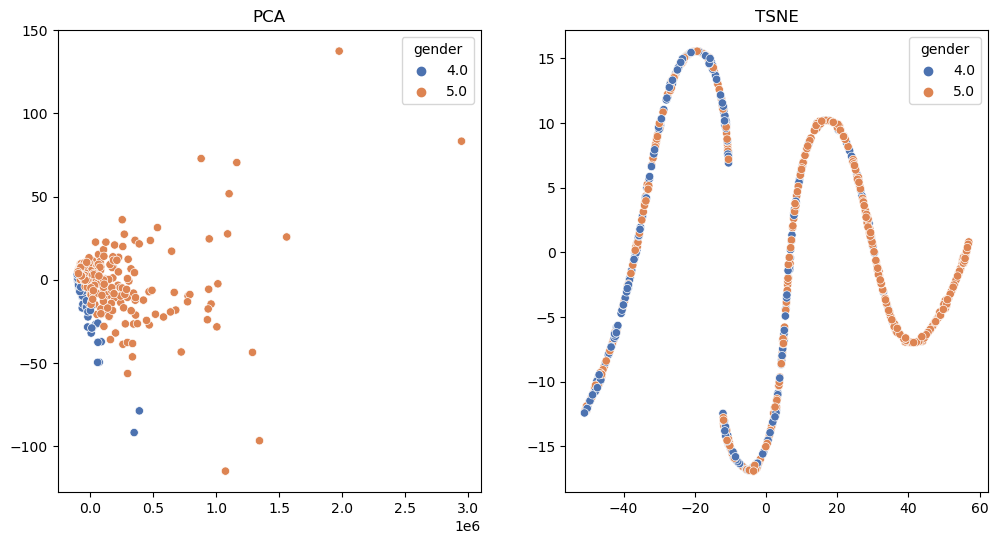

In [70]:
# 5 means Male and 4 means Female
fig , ax = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=total.iloc[:,1],palette="deep",ax=ax[0])
ax[0].set_title("PCA")
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=total.iloc[:,1],palette="deep",ax=ax[1])
ax[1].set_title("TSNE")